In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/hongsukyi/Lectures/main/data/vds16.csv")

In [3]:
df['hour']=pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M')
df['hour'] = df['hour'].dt.hour
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,hour
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,0
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,0
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,0
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,0
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,0


In [4]:
jump = 288
n7 = 12*7 
n9 = 12*9 
n20= 12*20

ns = jump 
ne = jump*3

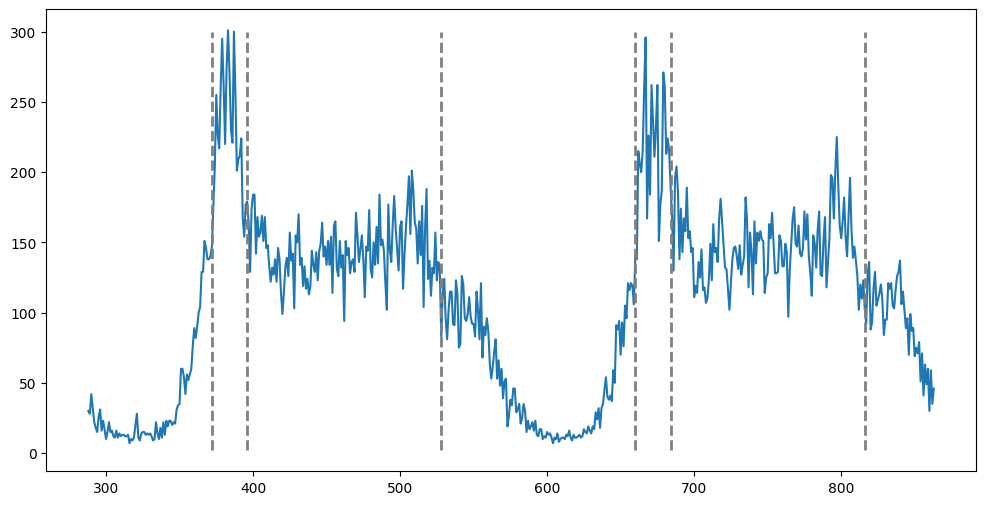

In [5]:
plt.figure(figsize=(12,6))

plt.plot(df["ToVol"][ns:ne],label='ToVol')
plt.vlines(ns+n7, 2, 300, color='gray', linestyle='--', linewidth=2)
plt.vlines(ns+n9, 2, 300, color='gray', linestyle='--', linewidth=2)
plt.vlines(ns+n20, 2, 300, color='gray', linestyle='--', linewidth=2)
plt.vlines(ns*2+n7, 2, 300, color='gray', linestyle='--', linewidth=2)
plt.vlines(ns*2+n9, 2, 300, color='gray', linestyle='--', linewidth=2)
plt.vlines(ns*2+n20, 2, 300, color='gray', linestyle='--', linewidth=2)

In [6]:
num_classes = 3

def label_hour(x):
    if ( x < 7 or x > 20):
        label = 'Fast'
    elif (x > 9 and x < 18) :
        label = 'Slow'
    else :
        label = 'Jam'
    return label

df["label3"] = df["hour"].apply(lambda x: label_hour(x))
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,hour,label3
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,0,Fast
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,0,Fast
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,0,Fast
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,0,Fast
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,0,Fast


<Axes: xlabel='label3', ylabel='count'>

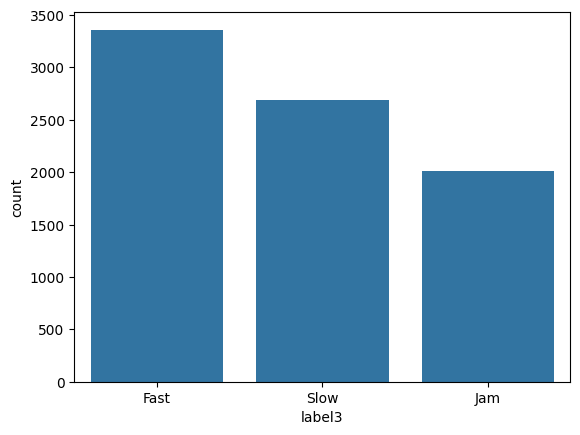

In [7]:
sns.countplot(x="label3", data=df, order = df["label3"].value_counts().index)

In [8]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,hour,label3
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,0,Fast
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,0,Fast
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,0,Fast
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,0,Fast
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,0,Fast


## Label을 2개로 할 떄

In [9]:
jump = 288
n7 = 12*7 
n20= 12*20

ns = jump 
ne = jump*3

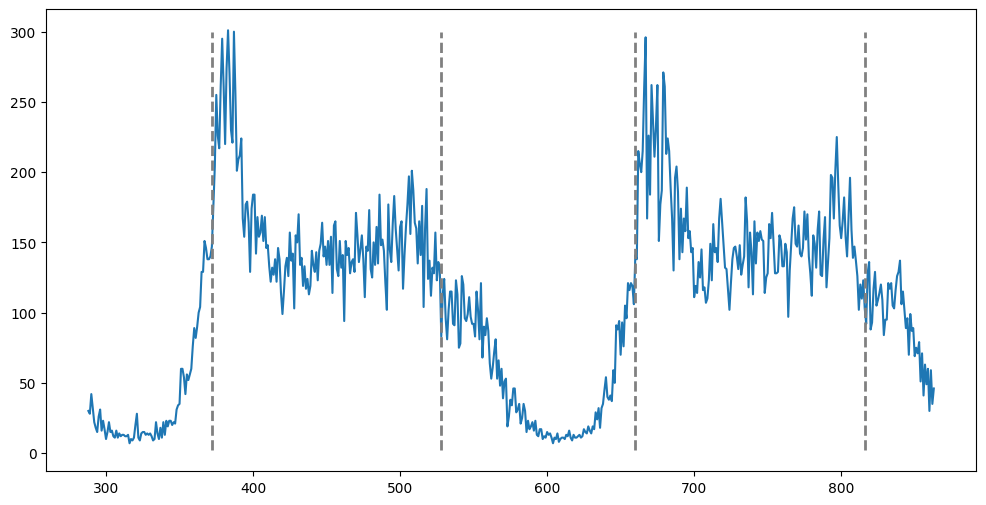

In [10]:
plt.figure(figsize=(12,6))

plt.plot(df["ToVol"][ns:ne],label='ToVol')
plt.vlines(ns+n7, 2, 300, color='gray', linestyle='--', linewidth=2)
plt.vlines(ns+n20, 2, 300, color='gray', linestyle='--', linewidth=2)
plt.vlines(ns*2+n7, 2, 300, color='gray', linestyle='--', linewidth=2)
plt.vlines(ns*2+n20, 2, 300, color='gray', linestyle='--', linewidth=2)

In [11]:
num_classes = 2

def label_hour(x):
    if ( x < 7 or x > 20):
        label = 'Fast'
    else:
        label = 'Slow'       
    return label

df["label2"] = df["hour"].apply(lambda x: label_hour(x))

<Axes: xlabel='label2', ylabel='count'>

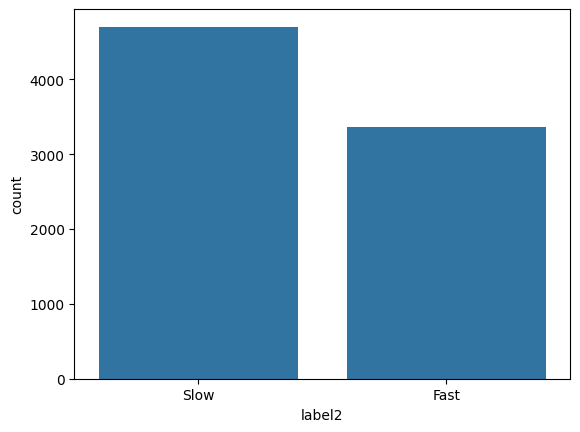

In [12]:
sns.countplot(x="label2", data=df, order = df["label2"].value_counts().index)

In [13]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,hour,label3,label2
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,0,Fast,Fast
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,0,Fast,Fast
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,0,Fast,Fast
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,0,Fast,Fast
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,0,Fast,Fast


In [14]:
df.to_csv('vds_label_by_hour.csv')

In [19]:
# 각 라벨별로 50개씩 랜덤 샘플링
df_f = df[df['label3'] == 'Fast'].sample(n=50, random_state=42)
df_s = df[df['label3'] == 'Slow'].sample(n=50, random_state=42)
df_n = df[df['label3'] == 'Jam'].sample(n=50, random_state=42)

# 새로운 데이터프레임 생성
df_150 = pd.concat([df_f, df_s, df_n], ignore_index=True)

# 결과 출력
print(df_150.head())


               Date  ToVol  SmVol  MeVol  LaVol  Speed  OccRate  hour label3  \
0   2017-04-11 2:50     17     12      4      1   53.3     0.89     2   Fast   
1   2017-04-15 6:50    100     71     28      1   53.3     3.56     6   Fast   
2   2017-04-13 2:05     14      9      5      0   57.4     0.63     2   Fast   
3  2017-04-19 22:55     59     46     13      0   50.0     2.51    22   Fast   
4   2017-04-03 6:20    104     66     35      3   56.9     3.60     6   Fast   

  label2  
0   Fast  
1   Fast  
2   Fast  
3   Fast  
4   Fast  


<Axes: xlabel='label3', ylabel='count'>

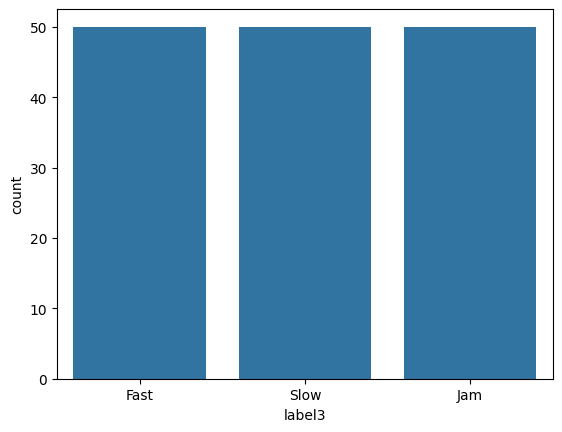

In [20]:
sns.countplot(x="label3", data=df_150, order = df_150["label3"].value_counts().index)

In [21]:
df_150.to_csv('vds_label_by_hour_150.csv')